# Données TITANIC

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/266px-RMS_Titanic_3.jpg">

 ## Description des variables :
 - PassengerId: and id given to each traveler on the boat
 - Pclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)
 - The Name of the passeger
 - The Sex
 - The Age
 - SibSp: number of siblings and spouses traveling with the passenger
 - Parch: number of parents and children traveling with the passenger
 - The ticket number
 - The ticket Fare
 - The cabin number
 - The embarkation. This describe three possible areas of the Titanic from which the people embark. Three possible values S,C,Q

https://www.kaggle.com/c/titanic

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.io.sql as pd_sql

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import azureml.core
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace
from azureml.train.automl import AutoMLConfig
from azureml.train.automl.run import AutoMLRun

import logging
import os
import random

from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow


In [4]:
# Installation SEABORN pour les graphiques
#!pip install seaborn
import seaborn as sns

## 1. Chargement des données

In [6]:
#url="http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"

url="https://raw.githubusercontent.com/retkowsky/titanic/master/train.csv"
titanic=pd.read_csv(url, index_col=None, na_values=['NA'])

# Suppression valeurs manquantes
titanic = titanic.dropna()

In [8]:
# Nombre de col et de lignes
print(titanic.shape)

(183, 12)


In [9]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [12]:
# Suppression de colones
titanic = titanic.drop(['Cabin','Parch'],axis=1)

In [13]:
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,17463,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,113783,26.5500,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,248698,13.0000,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,113788,35.5000,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,19950,263.0000,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,PC 17572,76.7292,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,113509,61.9792,C


## 2. Analyses exploratoires

In [14]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,512.329200


### Distribution variable Cible

Text(0.5, 1.0, 'Survie (1 = Survie, 0 = Décès)')

<Figure size 432x288 with 0 Axes>

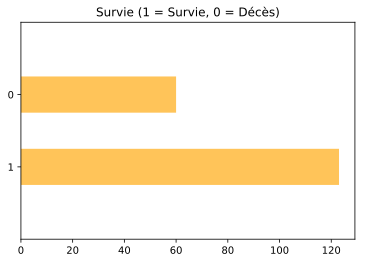

In [17]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
titanic.Survived.value_counts().plot(kind='barh', color="orange", alpha=.65)
ax.set_ylim(-1, len(titanic.Survived.value_counts())) 
plt.title("Survie (1 = Survie, 0 = Décès)")

### Distribution variable pclass

In [18]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
1,2,0.800000
0,1,0.670886
2,3,0.500000


### Distribution variable sexe

In [19]:
titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.931818
1,male,0.431579


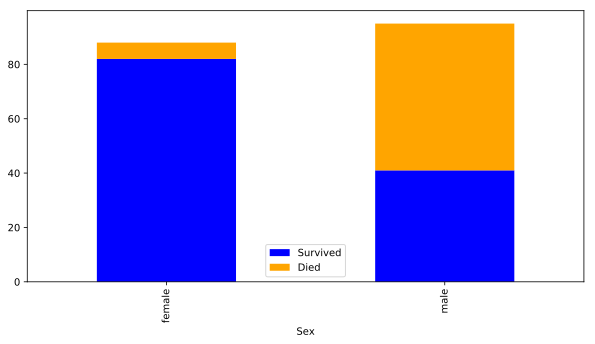

In [20]:
titanic['Died'] = 1 - titanic['Survived']
titanic.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 5),
                                                          stacked=True, color=['b', 'orange']);

### Distribution variable Sexe en %

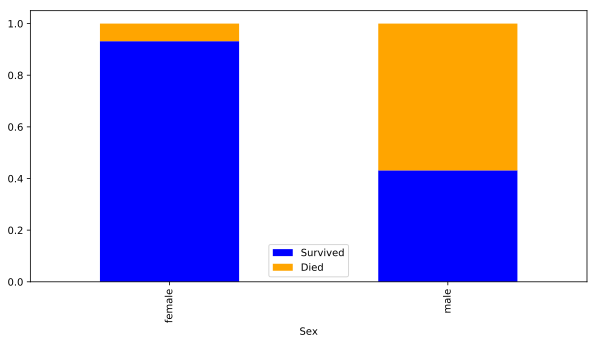

In [21]:
titanic.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 5), 
                                                           stacked=True, color=['b', 'orange']);

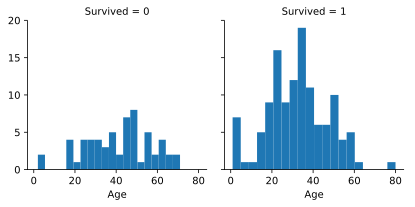

In [22]:
g = sns.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age', bins=20)

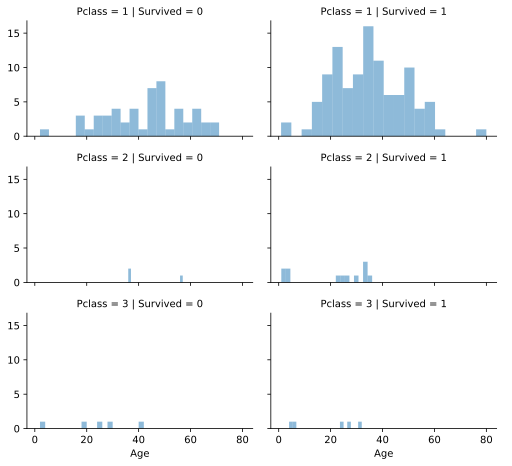

In [23]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

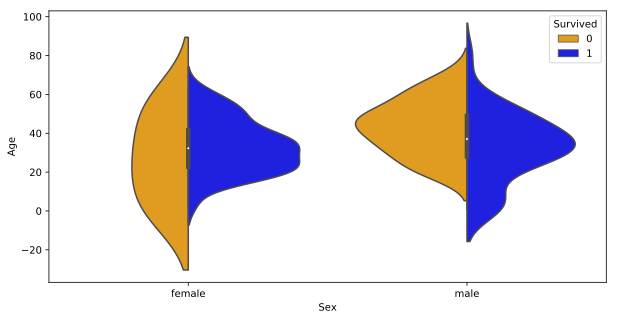

In [24]:
fig = plt.figure(figsize=(10, 5))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=titanic, 
               split=True,
               palette={0: "orange", 1: "b"}
              );

### Analyse de l'influence du prix

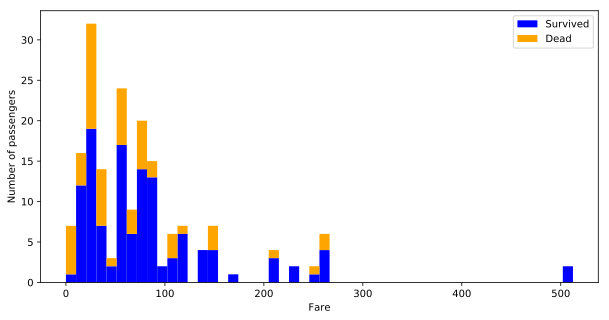

In [25]:
figure = plt.figure(figsize=(10, 5))
plt.hist([titanic[titanic['Survived'] == 1]['Fare'], titanic[titanic['Survived'] == 0]['Fare']], 
         stacked=True, color = ['b','orange'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

### Analyse de la cible


Number of survivors and non-survivors : 
 1    123
0     60
Name: Survived, dtype: int64

Percentage of survivors and non-survivors : 
 1    67.213115
0    32.786885
Name: Survived, dtype: float64


Text(0.5, 1.0, 'Distribution of Survival, (1 = Survived)')

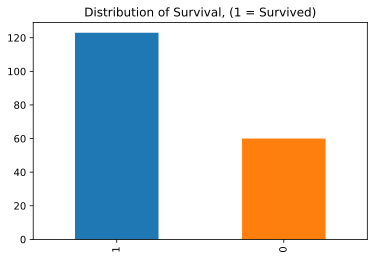

In [26]:
print("\nNumber of survivors and non-survivors : \n",titanic['Survived'].value_counts())
print("\nPercentage of survivors and non-survivors : \n",titanic['Survived'].value_counts() * 100 / len(titanic))

alpha_color = 0.7
titanic['Survived'].value_counts().plot(kind='bar')
plt.title("Distribution of Survival, (1 = Survived)")


Min age = 0.92
Max age = 80.0


Text(0.5, 1.0, 'Survival by Age,  (1 = Survived)')

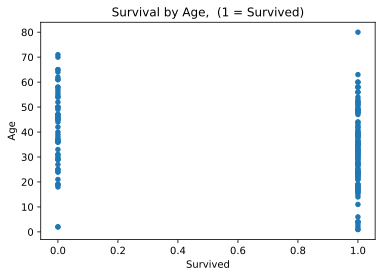

In [27]:
print("\nMin age =",titanic['Age'].min())
print("Max age =",titanic['Age'].max())

titanic.plot(kind='scatter',x='Survived',y='Age')
plt.title("Survival by Age,  (1 = Survived)")

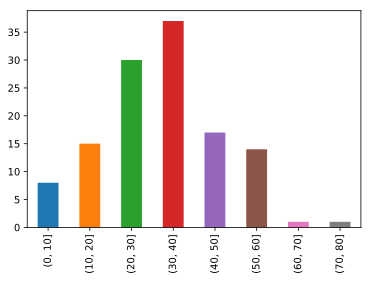

In [28]:
#Let's display the graph showing number of survivors in each age groups
b = [0, 10, 20, 30, 40, 50, 60, 70, 80,]
titanic['AgeBin'] = pd.cut(titanic['Age'],b)
titanic[titanic['Survived'] == 1]['AgeBin'].value_counts().sort_index().plot(kind='bar')

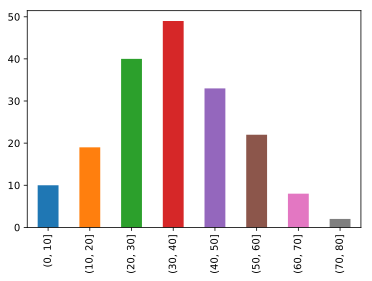

In [29]:
titanic['AgeBin'].value_counts().sort_index().plot(kind='bar')



Number of passengers in each classes: 
 1    158
2     15
3     10
Name: Pclass, dtype: int64


,PassengerId,Survived,Age,SibSp,Fare,Died
Pclass,,,,,,
1,467.221519,0.670886,37.591266,0.487342,88.683228,0.329114
2,343.266667,0.800000,25.266667,0.400000,18.444447,0.200000
3,436.200000,0.500000,21.000000,0.200000,11.027500,0.500000


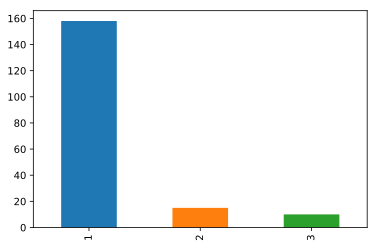

In [30]:
print("\n\nNumber of passengers in each classes: \n",titanic['Pclass'].value_counts())
titanic['Pclass'].value_counts().sort_index().plot(kind='bar')
titanic.groupby('Pclass').mean()

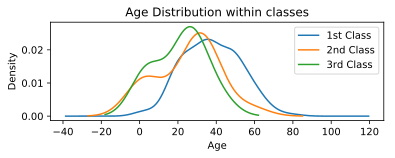

In [31]:
plt.subplot2grid((2,2),(0,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
titanic.Age[titanic.Pclass == 1].plot(kind='kde')    
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
 # plots antitanic axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')

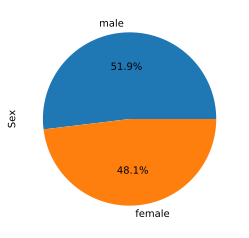

In [32]:
titanic['Sex'].value_counts().plot(kind='pie',autopct='%1.01f%%')

In [33]:
titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.931818
1,male,0.431579


In [34]:
genderclass = titanic.groupby(['Pclass','Sex']).mean()
genderclass

PassengerId  Survived        Age     SibSp        Fare  \
Pclass Sex                                                              
1      female   472.783784  0.959459  34.094595  0.581081  103.128209   
       male     462.321429  0.416667  40.671667  0.404762   75.957888   
2      female   440.666667  0.888889  29.611111  0.222222   14.865744   
       male     197.166667  0.666667  18.750000  0.666667   23.812500   
3      female   337.600000  0.600000  17.200000  0.400000   13.360000   
       male     534.800000  0.400000  24.800000  0.000000    8.695000   

                   Died  
Pclass Sex               
1      female  0.040541  
       male    0.583333  
2      female  0.111111  
       male    0.333333  
3      female  0.400000  
       male    0.600000

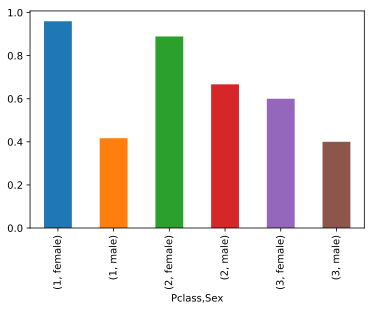

In [35]:
genderclass['Survived'].plot.bar()

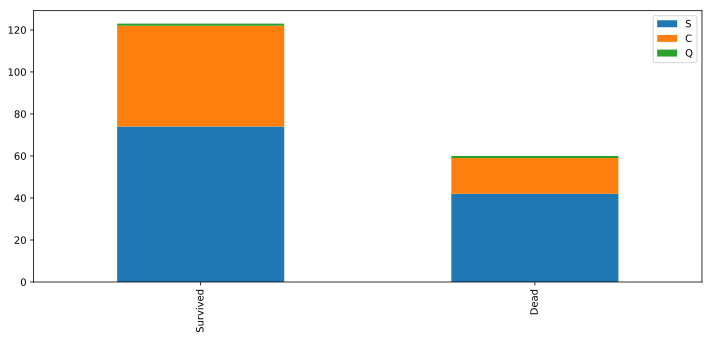

In [36]:
survived_embark = titanic[titanic['Survived']==1]['Embarked'].value_counts()
dead_embark = titanic[titanic['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(12,5))

In [37]:
#we are going to predict the survived column, which is our target
col_target=['Survived']
#we are only taking age, sex, pclass and fare as they are only the ddetermining factors
col_train=['Age','Pclass','Sex','Fare','SibSp']
#we separate the dataset into two variables
X=titanic[col_train]
y=titanic[col_target]

In [38]:
X.describe()

,Age,Pclass,Fare,SibSp
count,183.000000,183.000000,183.000000,183.000000
mean,35.674426,1.191257,78.682469,0.464481
std,15.643866,0.515187,76.347843,0.644159
min,0.920000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,29.700000,0.000000
50%,36.000000,1.000000,57.000000,0.000000
75%,47.500000,1.000000,90.000000,1.000000
max,80.000000,3.000000,512.329200,3.000000


In [39]:
dic = {'male':0,'female':1}
X['Sex']=X['Sex'].apply(lambda x:dic[x])

C:\Anaconda\envs\AzureML\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
X.head()

,Age,Pclass,Sex,Fare,SibSp
1,38.0,1,1,71.2833,1
3,35.0,1,1,53.1000,1
6,54.0,1,0,51.8625,0
10,4.0,3,1,16.7000,1
11,58.0,1,1,26.5500,0


## 3. Modélisation AutoML avec Azure ML service

### 3.1 Partitionnement des données

In [41]:
#splitting the data to taining and testing Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8, random_state=10)

In [42]:
y_train.head()

,Survived
690,1
452,0
183,1
438,0
460,1


### 3.2 Connexion workspace Azure ML service

In [43]:
ws = Workspace.from_config()

# Choose a name for the experiment and specify the project folder.
experiment_name = 'titanic'
project_folder = './sample_projects/titanic'

experiment = Experiment(ws, experiment_name)

output = {}
output['SDK version'] = azureml.core.VERSION
output['Workspace Name'] = ws.name
output['Resource Group'] = ws.resource_group
output['Location'] = ws.location
output['Project Directory'] = project_folder
output['Experiment Name'] = experiment.name
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(data = output, index = ['']).T

Falling back to use azure cli credentials. This fall back to use azure cli credentials will be removed in the next release. 
Make sure your code doesn't require 'az login' to have happened before using azureml-sdk, except the case when you are specifying AzureCliAuthentication in azureml-sdk.


Found the config file in: C:\Users\seretkow\notebooks\Labs Azure ML service\aml_config\config.json


,
SDK version,1.0.10
Workspace Name,MLServiceWorkspace
Resource Group,mlserviceresourcegroup
Location,westeurope
Project Directory,./sample_projects/titanic
Experiment Name,titanic


In [44]:
y_train.values.flatten()

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

### 3.3 AutoML avec Azure ML service

In [46]:
automl_settings = {
    "iteration_timeout_minutes" : 10,
    "iterations" : 50,
    "primary_metric" : 'AUC_weighted',
    "verbosity" : logging.INFO,
    "n_cross_validations": 3
}

In [47]:
from azureml.train.automl import AutoMLConfig

automated_ml_config = AutoMLConfig(task = 'classification',
                             debug_log = 'automated_ml_errors.log',
                             path = project_folder,
                             preprocess=True,
                             X = X_train.values,
                             y = y_train.values.flatten(),
                             **automl_settings)

In [48]:
from azureml.core.experiment import Experiment
experiment=Experiment(ws, experiment_name)
local_run = experiment.submit(automated_ml_config, show_output=True)

Running on local machine
Parent Run ID: AutoML_cbaf7d4d-3eb8-4698-a5ca-5ccaeee7c021
*******************************************************************************************************************
ITERATION: The iteration being evaluated.
PIPELINE: A summary description of the pipeline being evaluated.
TRAINFRAC: Fraction of the training data to train on.
DURATION: Time taken for the current iteration.
METRIC: The result of computing score on the fitted pipeline.
BEST: The best observed score thus far.
*******************************************************************************************************************

 ITERATION   PIPELINE                                       TRAINFRAC  DURATION      METRIC      BEST
         0   RobustScaler KNN                               1.0000     0:00:19       0.8333    0.8333
         1   StandardScalerWrapper LightGBM                 1.0000     0:00:07       0.5000    0.8333
         2   StandardScalerWrapper LightGBM                 1.0000

In [49]:
local_run

Experiment,Id,Type,Status,Details Page,Docs Page
titanic,AutoML_cbaf7d4d-3eb8-4698-a5ca-5ccaeee7c021,automl,Completed,Link to Azure Portal,Link to Documentation


### Le meilleur modèle est un LightGBM avec une aire sous la courbe (AUC) = 0,8940
L'sensemble modèle fournit un AUC de 0,9

In [50]:
from azureml.widgets import RunDetails
RunDetails(local_run).show()

_AutoMLWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': True, 'log_level': 'INFO', 'sd…

### 3.4 Ensemble des résultats autoML

In [52]:
children = list(local_run.get_children())
metricslist = {}
for run in children:
    properties = run.get_properties()
    metrics = {k: v for k, v in run.get_metrics().items() if isinstance(v, float)}
    metricslist[int(properties['iteration'])] = metrics

rundata = pd.DataFrame(metricslist).sort_index(1)
rundata

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
AUC_macro,0.833333,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.835714,0.723810,0.500000,0.835714,0.500000,0.835714,0.852381,0.857143,0.835714,0.900000
AUC_micro,0.833333,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.835714,0.723810,0.500000,0.835714,0.500000,0.835714,0.852381,0.857143,0.835714,0.900000
AUC_weighted,0.833333,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.835714,0.723810,0.500000,0.835714,0.500000,0.835714,0.852381,0.857143,0.835714,0.900000
accuracy,0.638889,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,...,0.694444,0.611111,0.333333,0.694444,0.333333,0.694444,0.694444,0.750000,0.694444,0.583333
average_precision_score_macro,0.896736,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.920311,0.870135,0.666667,0.920311,0.666667,0.920311,0.923645,0.936635,0.920311,0.954837
average_precision_score_micro,0.896736,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.920311,0.870135,0.666667,0.920311,0.666667,0.920311,0.923645,0.936635,0.920311,0.954837
average_precision_score_weighted,0.896736,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.920311,0.870135,0.666667,0.920311,0.666667,0.920311,0.923645,0.936635,0.920311,0.954837
balanced_accuracy,0.650000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.735714,0.616667,0.500000,0.735714,0.500000,0.735714,0.735714,0.802381,0.735714,0.583333
f1_score_macro,0.555556,0.243697,0.243697,0.243697,0.243697,0.243697,0.243697,0.243697,0.243697,0.243697,...,0.655813,0.493177,0.243697,0.655813,0.243697,0.655813,0.655813,0.734991,0.655813,0.430799
f1_score_micro,0.638889,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,...,0.694444,0.611111,0.333333,0.694444,0.333333,0.694444,0.694444,0.750000,0.694444,0.583333


### 3.5 Choix du meilleur modèle selon l'AUC

In [53]:
best_run, fitted_model = local_run.get_output()

print("Meilleur modèle :")
print("")
print(best_run)
print("")
print(fitted_model)

Meilleur modèle :

Run(Experiment: titanic,
Id: AutoML_cbaf7d4d-3eb8-4698-a5ca-5ccaeee7c021_49,
Type: None,
Status: Completed)

Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(logger=None, task=None)), ('prefittedsoftvotingclassifier', PreFittedSoftVotingClassifier(classification_labels=None,
               estimators=[('LogisticRegression', Pipeline(memory=None,
     steps=[('standardscalerwrapper', <automl.client.core.common.mo...67, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.13333333333333333, 0.4, 0.2]))])


### 3.6 Changement métrique de qualité (On utilise maintenant le F1)
##### F1=2*(Precision X Recall)/(Precision+Recall)
https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

In [54]:
lookup_metric = "f1_score_weighted"

best_run, fitted_model = local_run.get_output(metric = lookup_metric)

print("Meilleur modèle F1:")
print("")
print(best_run)
print("")
print(fitted_model)

Meilleur modèle F1:

Run(Experiment: titanic,
Id: AutoML_cbaf7d4d-3eb8-4698-a5ca-5ccaeee7c021_25,
Type: None,
Status: Completed)

Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(logger=None, task=None)), ('maxabsscaler', MaxAbsScaler(copy=True)), ('logisticregression', LogisticRegression(C=2.559547922699533, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False))])


### 3.7 Choix d'une itération particulière

In [55]:
# nous allons prendre par aexemple l'itération 16
iteration = 16


sixteen_run, sixteen_model = local_run.get_output(iteration = iteration)
print("Modèle 16eme itération :")
print("")
print(sixteen_run)
print("")
print(sixteen_model)

Modèle 16eme itération :

Run(Experiment: titanic,
Id: AutoML_cbaf7d4d-3eb8-4698-a5ca-5ccaeee7c021_16,
Type: None,
Status: Completed)

Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(logger=None, task=None)), ('standardscalerwrapper', <automl.client.core.common.model_wrappers.StandardScalerWrapper object at 0x000001CDABCA4550>), ('lightgbmclassifier', <automl.client.core.common.model_wrappers.LightGBMClassifier object at 0x000001CDABE58128>)])


In [56]:
#test = pd.read_csv('test.csv')

In [57]:
#test.head()

In [58]:
#test = test.drop(['name'],axis=1)

In [59]:
#dic = {'male':0,'female':1}
#test['sex']=test['sex'].apply(lambda x:dic[x])

In [60]:
#predicted = fitted_model.predict(test.values)

In [61]:
#print(predicted)